In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
import sys
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold, LeaveOneOut
from sklearn.feature_selection import SequentialFeatureSelector

from get_data import *

In [2]:
ds = get_data_model_v1()
ds.info()


Database object created
<class 'pandas.core.frame.DataFrame'>
Int64Index: 713 entries, 0 to 712
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        713 non-null    int64  
 1   titulo                    713 non-null    object 
 2   descripcion               701 non-null    object 
 3   extra_info                709 non-null    object 
 4   n_habitaciones            713 non-null    int64  
 5   tamano                    713 non-null    int64  
 6   precio                    713 non-null    float64
 7   municipio                 713 non-null    object 
 8   n_banos                   708 non-null    float64
 9   n_plazas_garaje           708 non-null    float64
 10  direccion                 708 non-null    object 
 11  landmarks_cercanos        708 non-null    object 
 12  piscina                   713 non-null    bool   
 13  valoracion                708 non-null   

c:\Users\ivan\Desktop\Coding\corunaRealEstateMarket\bd.py:46: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, self.connection)


### Linear reg

c:\Users\ivan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


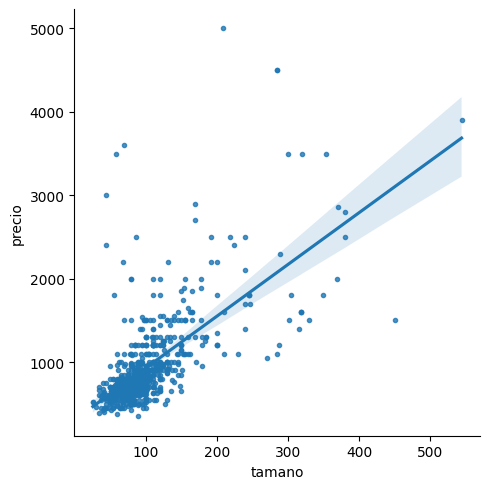

In [3]:
sns.lmplot(x ='tamano', y ='precio', data = ds, markers='.')

c:\Users\ivan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


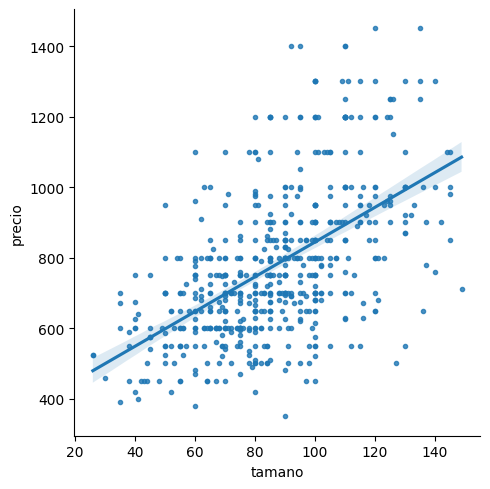

In [7]:
ds_aux = ds[ds['precio'] < 1500]
ds_aux = ds_aux[ds_aux['tamano'] < 150]
sns.lmplot(x ='tamano', y ='precio', data = ds_aux, markers='.', order=1)

c:\Users\ivan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


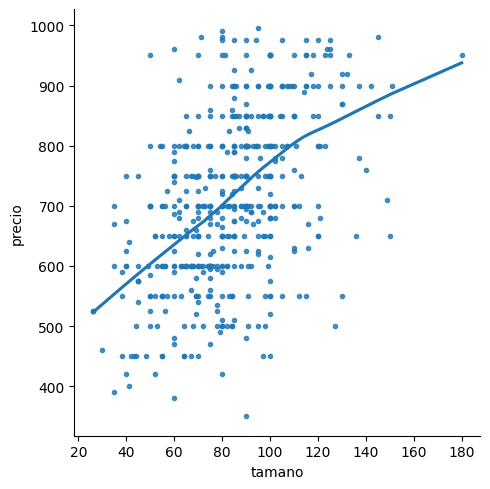

In [5]:
ds_aux = ds[ds['precio'] < 1000]
sns.lmplot(x ='tamano', y ='precio', data = ds_aux, markers='.', lowess=True)

c:\Users\ivan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


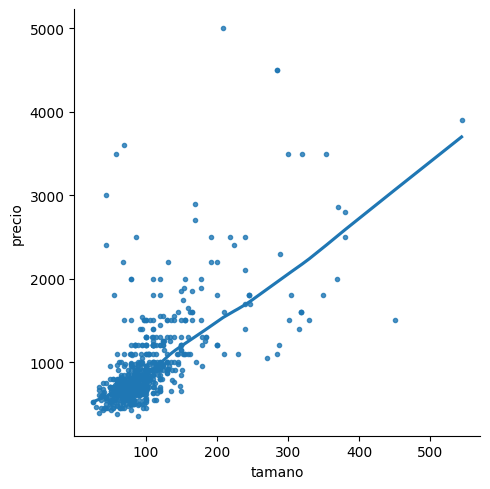

In [8]:
sns.lmplot(x ='tamano', y ='precio', data = ds, markers='.', lowess=True)

In [9]:
ds['precio_log'] = np.log(ds['precio'])

c:\Users\ivan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


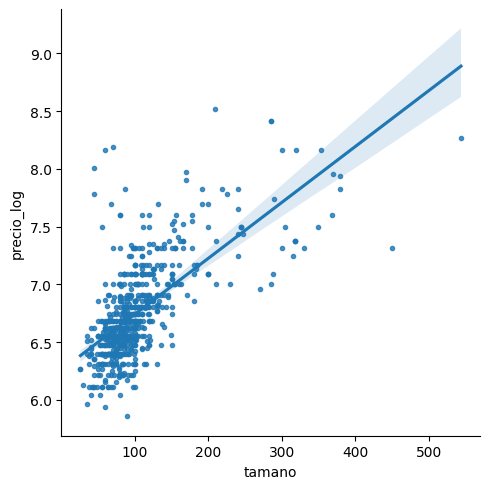

In [10]:
sns.lmplot(x ='tamano', y ='precio_log', data = ds, markers='.')

### Precio m2

In [8]:
ds['precio_m2'] = ds['precio']/ds['tamano']

c:\Users\ivan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


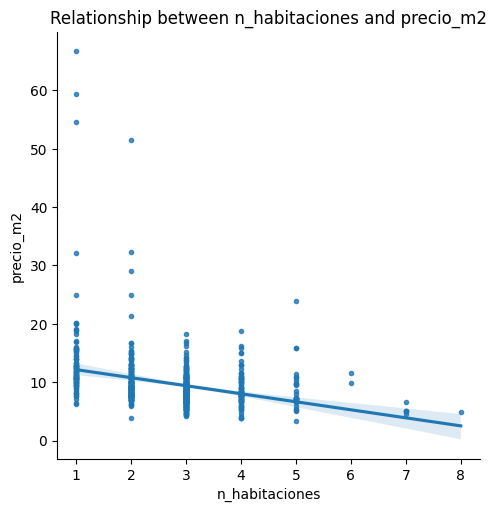

c:\Users\ivan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


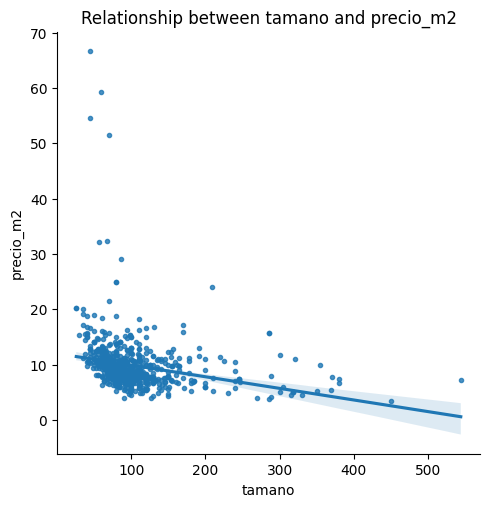

In [14]:
columns_plot = ['n_habitaciones', 'tamano', 'piscina', 'valoracion', 'densidad', 'pib_capita', 'parking', 'estudiantes', 'playa', 'balcon', 'trastero', 'vacacional', 'vistas', 'sin_ascensor', 'profesores', 'amueblado', 'es_casa']
columns_plot = ['n_habitaciones', 'tamano']
for column in columns_plot:
        sns.lmplot(x=column, y='precio_m2', data=ds, markers='.', order=1)
        plt.title(f'Relationship between {column} and precio_m2')
        plt.show()

### Linear reg por municipio

##### Precio

c:\Users\ivan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


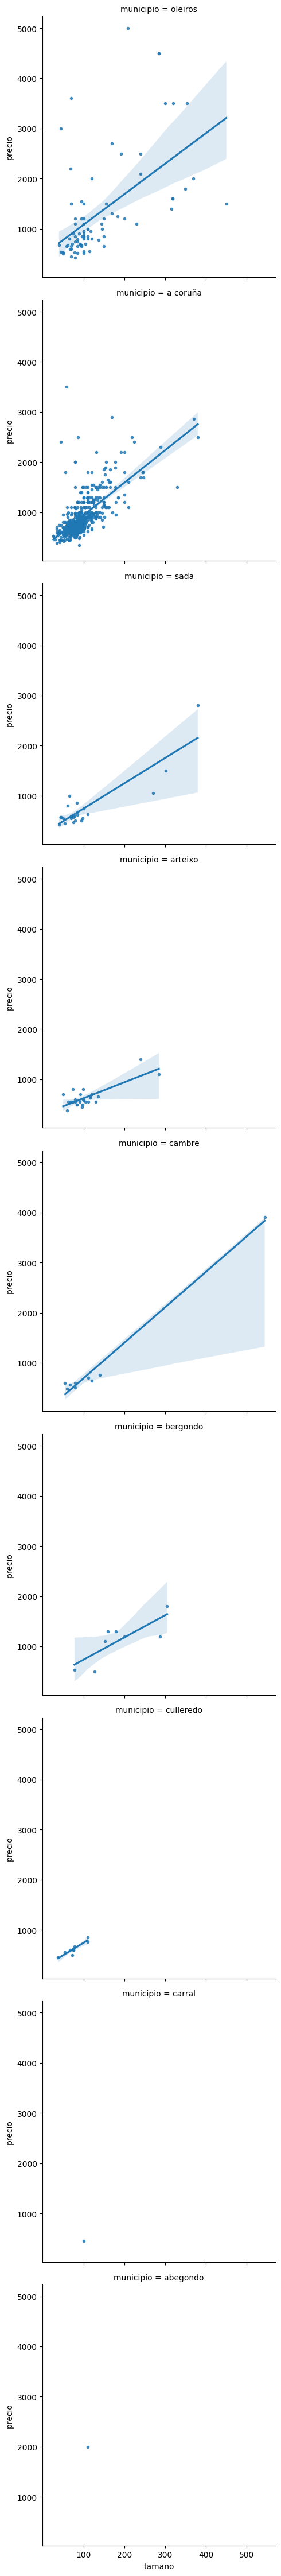

In [9]:
sns.lmplot(x ='tamano', y ='precio', data = ds, row ='municipio', markers='.')

##### Precio por m2

###### Precio hab

c:\Users\ivan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


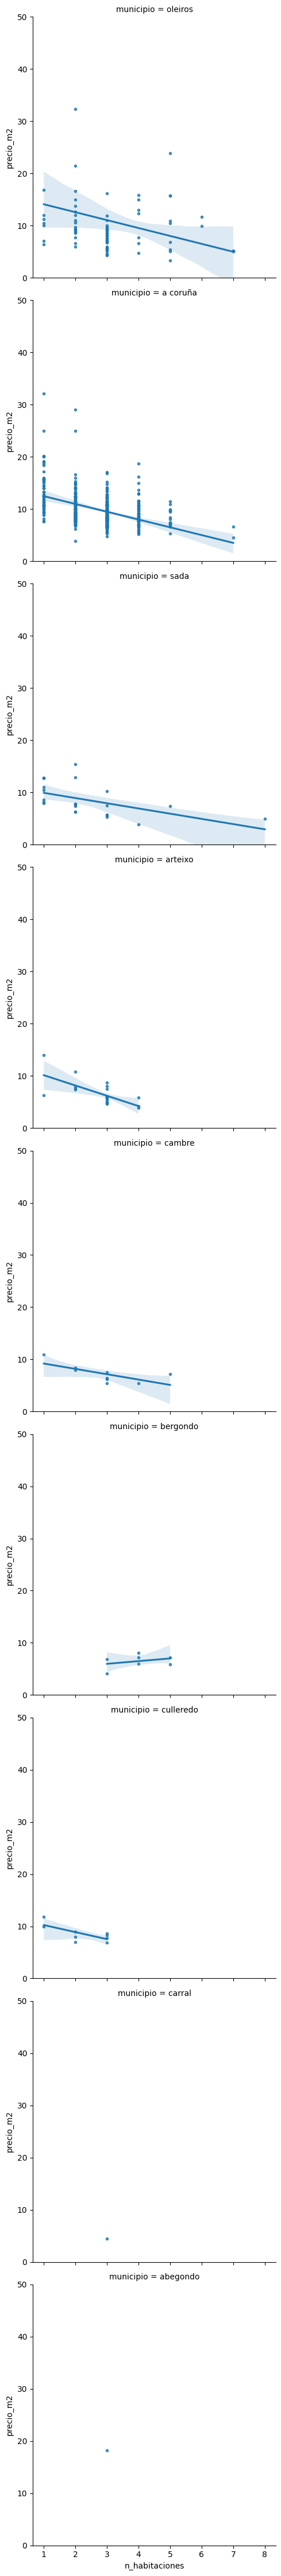

In [36]:
g = sns.lmplot(x='n_habitaciones', y='precio_m2', row='municipio', data=ds, markers='.')
g.set(ylim=(0, 50))  # Set the minimum y-axis limit to 0
plt.show()

###### Tamano

c:\Users\ivan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


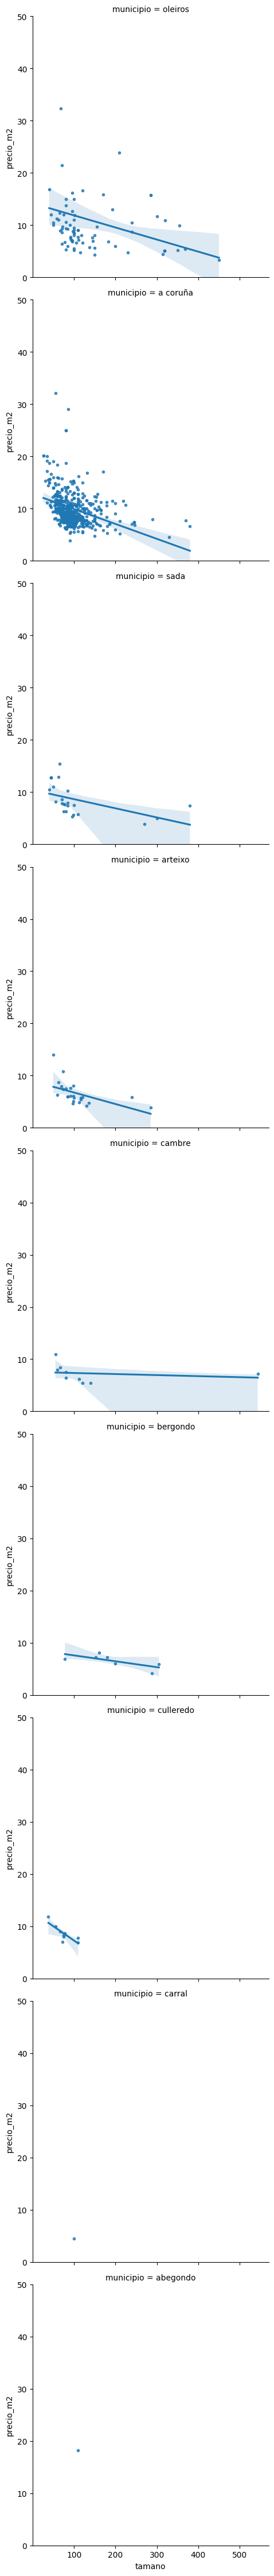

In [34]:
g = sns.lmplot(x='tamano', y='precio_m2', row='municipio', data=ds, markers='.')
g.set(ylim=(0, 50))  # Set the minimum y-axis limit to 0
plt.show()